# Group 6 Project 1 Analysis

# Initial Data Cleanse

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gmaps
import getpass

## Import US data from 2007 to 2018(csv), concat 2018 data, and then clean data. Save csv to folder


In [2]:
us10yr = pd.read_csv("inc5000US10years.csv", encoding="latin1")
us2018 = pd.read_csv("US2018.csv", encoding="latin1")

In [3]:
us10yr.head()

,year,_ - rank,_ - city,_ - growth,_ - workers,_ - company,_ - state_s,_ - state_l,_ - revenue,_ - yrs_on_list,_ - industry,_ - metro
0,2016,1,Los Angeles,66788.5962,218.0,Loot Crate,CA,California,116247698.0,1,Consumer Products & Services,Los Angeles
1,2016,2,Somerville,36555.2472,100.0,Paint Nite,MA,Massachusetts,55018793.0,2,Consumer Products & Services,Boston
2,2016,3,Visalia,31633.5448,47.0,CalCom Solar,CA,California,33507450.0,2,Energy,"Visalia-Porterville, CA"
3,2016,4,Evansville,23619.7198,82.0,eLuxurySupply.com,IN,Indiana,30695215.0,2,Retail,"Evansville, IN-KY"
4,2016,5,Atlanta,23486.8894,48.0,Company.com,GA,Georgia,33370967.0,2,Business Products & Services,Atlanta


#### Concacts the usdata csvs

In [4]:
us10yrclean = us10yr.rename(columns={'_ - rank':'rank', '_ - city':'city','_ - growth':'growth', 
                      '_ - workers':'workers', '_ - workers':'workers',
                      '_ - company': 'company', '_ - state_s':'state_s', '_ - state_l':'state_l',
                      '_ - revenue':'revenue', '_ - yrs_on_list':'yrsonlist','_ - industry':'industry',
                      '_ - metro':'metro'
                      })

In [5]:
del us10yrclean['state_l']
del us10yrclean['metro']
del us10yrclean['rank']

In [6]:
US_list= [us10yrclean, us2018]
usTable=pd.concat(US_list, sort=False)
usTable.head()

,year,city,growth,workers,company,state_s,revenue,yrsonlist,industry,state
0,2016,Los Angeles,66788.5962,218.0,Loot Crate,CA,116247698.0,1.0,Consumer Products & Services,NaN
1,2016,Somerville,36555.2472,100.0,Paint Nite,MA,55018793.0,2.0,Consumer Products & Services,NaN
2,2016,Visalia,31633.5448,47.0,CalCom Solar,CA,33507450.0,2.0,Energy,NaN
3,2016,Evansville,23619.7198,82.0,eLuxurySupply.com,IN,30695215.0,2.0,Retail,NaN
4,2016,Atlanta,23486.8894,48.0,Company.com,GA,33370967.0,2.0,Business Products & Services,NaN


#### Removes NaN values and replaces with "Unknown" in the industry column, and removed rows with a blank in revenue or 
#### growth

In [7]:
usTable.loc[(usTable["revenue"].isnull()),'industry'] = "Unknown"

In [8]:
usTable=usTable.drop(usTable.loc[(usTable["revenue"].isnull()),:].index[:])
usTable=usTable.drop(usTable.loc[(usTable["workers"].isnull()),:].index[:])
usTable=usTable.drop(usTable.loc[(usTable["growth"].isnull()),:].index[:])
usTable=usTable.drop(usTable.loc[(usTable["city"].isnull()),:].index[:])
usTable=usTable.drop(usTable.loc[(usTable["state_s"].isnull()),:].index[:])
usTable=usTable.drop(usTable.loc[(usTable["industry"].isnull()),:].index[:])

#### Validate cleaning process

In [9]:
usTable.count()

year         45147
city         45147
growth       45147
workers      45147
company      45147
state_s      45147
revenue      45147
yrsonlist    45147
industry     45147
state            0
dtype: int64

In [10]:
usTable.isnull().any()

year         False
city         False
growth       False
workers      False
company      False
state_s      False
revenue      False
yrsonlist    False
industry     False
state         True
dtype: bool

#### Save cleaned data to csv

In [11]:
usTable.to_csv("Testusclean.csv",index=False)

## Import Europe data seperate years and concact into one uniform European dataframe for analysis

In [12]:
eu2016= pd.read_csv("Inc5000eu_2016.csv", encoding="latin1")
eu2017= pd.read_csv("inc5000eu_2017.csv", encoding="latin1")
eu2018= pd.read_csv("inc500eu_2018.csv", encoding="latin1")

In [13]:
eu2016.columns

Index(['2016 Rank', 'Company', 'URL', 'Address', 'City', 'ZIP',
       'Employee Count', 'Founded Year', 'Company Phone', 'Revenue',
       'Inc.com URL', 'Growth', 'Revenue Raw', 'Country', 'Industry',
       'Years on INC 5000'],
      dtype='object')

In [14]:
eu2017.columns

Index(['url', 'rank', 'city', 'growth', 'company', 'revenue', 'country',
       'industry', 'yrs_on_list'],
      dtype='object')

In [15]:
eu2018.columns

Index([' url', ' rank', ' city', ' growth', ' company', ' country', ' revenue',
       ' industry', ' yrs_on_list'],
      dtype='object')

In [16]:
eu2016["year"]=""
eu2016.loc[:,'year']=2016
eu2017["year"]=""
eu2017.loc[:,'year']=2017
eu2018["year"]=""
eu2018.loc[:,'year']=2018

#### Make sure all columns are the same throughout all of the dataframes

In [17]:
eu2016 = eu2016.rename(columns={'URL':'url', '2016 Rank':'rank', 'City':'city', 'Growth': 'growth','Company' :'company', 
                                'Revenue Raw':'revenue','Country':'country','Industry':'industry', 
                                'Years on INC 5000':'yrs_on_list'})

In [18]:
eu2018 = eu2018.rename(columns={' url':'url', ' rank':'rank', ' city':'city', ' growth': 'growth',' company' :'company', 
                                ' revenue':'revenue', ' country':'country',' industry':'industry', ' yrs_on_list':'yrs_on_list'})

In [19]:
eu2016New=eu2016.loc[:,['url', 'rank', 'city', 'growth', 'company', 'country', 'revenue',
       'industry', 'yrs_on_list', 'year']]

In [20]:
eu2016New.columns

Index(['url', 'rank', 'city', 'growth', 'company', 'country', 'revenue',
       'industry', 'yrs_on_list', 'year'],
      dtype='object')

#### Create list that holds every dataframe

In [21]:
list_europe= [eu2016New,eu2017, eu2018]

#### Create new DataFrame that concates all the seperate tables

In [22]:
europeTable=pd.concat(list_europe, sort=False)
europeTable.columns

Index(['url', 'rank', 'city', 'growth', 'company', 'country', 'revenue',
       'industry', 'yrs_on_list', 'year'],
      dtype='object')

#### Index value goes back to 0 when the year changes
#### Reset the index so the values do not reset to 0 after every new year

In [23]:
europeTable= europeTable.reset_index()

#### Drop the original index value

In [24]:
europeTable=europeTable.drop("index", axis=1)

#### Drop other unnecessary indices

In [25]:
europeTable=europeTable.drop("url", axis=1)
europeTable=europeTable.drop("rank", axis=1)

#### Check and see what the new dataframe looks like (looking at when the year changes from 2016 to 2017)

In [26]:
europeTable.iloc[4990:5010,:]

,city,growth,company,country,revenue,industry,yrs_on_list,year
4990,Parnu,94.4899,Import Auto OU,Estonia,4855748.0,Retail,1,2016
4991,Istanbul,94.3728,ODC Business Solutions,Turkey,3720418.0,Business Products & Services,1,2016
4992,Deisslingen,93.3333,Camping-Freizeit Dorn OHG,Germany,5800000.0,Travel & Hospitality,1,2016
4993,paris,92.2665,Apsia,France,5479404.0,IT Services,1,2016
4994,Stockholm,4694.9849,Daniel Wellington AB,Sweden,155773187.0,Retail,1,2017
4995,Tourlaville,3956.7425,LE Petit Vapoteur,France,14535633.0,Retail,1,2017
4996,Szekesfehervar,3954.0236,Martin Metal Product,Hungary,16473241.0,Construction,1,2017
4997,Helsinki,3864.1671,Odeal Oy,Finland,16736000.0,Business Products & Services,1,2017
4998,London,3469.0884,Balyasny Europe Asset Management LLP,United Kingdom,39409838.0,Financial Services,1,2017
4999,Stockholm,3456.6324,Cabonline Technologies AB,Sweden,9005500.0,Business Products & Services,1,2017


In [27]:
europeTable.isnull().any()

city            True
growth          True
company         True
country         True
revenue         True
industry       False
yrs_on_list    False
year           False
dtype: bool

#### Delete all rows that have no value for the company,country, and growth column

In [28]:
europeTable=europeTable.drop(europeTable.loc[(europeTable["company"].isnull()),:].index[:])
europeTable=europeTable.drop(europeTable.loc[(europeTable["country"].isnull()),:].index[:])
europeTable=europeTable.drop(europeTable.loc[(europeTable["growth"].isnull()),:].index[:])

#### Confirm there are no null values in table

In [29]:
europeTable.isnull().any()

city           False
growth         False
company        False
country        False
revenue        False
industry       False
yrs_on_list    False
year           False
dtype: bool

In [30]:
europeTable.to_csv("Testeuclean.csv",index=False)

# Analysis

### Scatterplots Revenue vs Growth per Industry

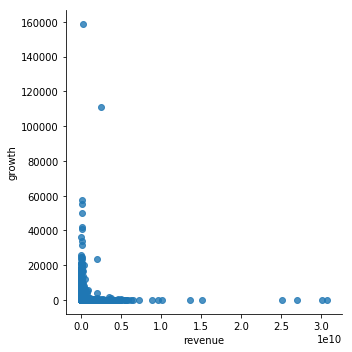

In [31]:
# Provide a dictionary to the palette argument
sns.lmplot( x="revenue", y="growth", data=usTable, fit_reg=False, 
           legend=False, palette=dict(setosa="#9b59b6", virginica="#3498db", versicolor="#95a5a6"))

### Stripplots Industry vs Revenue

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

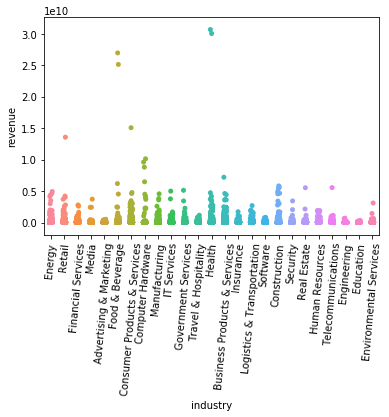

In [32]:
sns.stripplot(x="industry", y="revenue", jitter=True, data=usTable)
plt.xticks(rotation=85)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

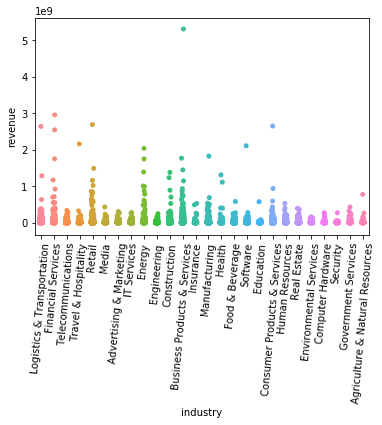

In [33]:
sns.stripplot(x="industry", y="revenue", jitter=True, data=europeTable)
plt.xticks(rotation=85)

### Revenue by Industry (Europe versus US)

In [34]:
us10yr=pd.read_csv("US2007to2018.csv" ,encoding="latin1")
eu16_17_18=pd.read_csv("euclean.csv",encoding="latin1" )

#### Drop category that isnt on both datasets

In [35]:
without_agricult=eu16_17_18.drop(eu16_17_18.loc[(eu16_17_18['industry']=='Agriculture & Natural Resources'),:].index[:])

#### Analyze only past three years

In [36]:
us16_17_18=us10yr.loc[(us10yr['year']==2016) | (us10yr['year']==2017) | (us10yr['year']==2018),:]

#### Reset and drop outdated index

In [37]:
us16_17_18=us16_17_18.reset_index()
us16_17_18=us16_17_18.drop("index", axis=1)

#### Group data by industry

In [38]:
us_industry_grouped=us16_17_18.groupby(by='industry')[['industry','revenue']].sum()
eu_industry_grouped=without_agricult.groupby(by='industry')[['industry','revenue']].sum()

#### Only show columns with interesting data

In [39]:
us_sub=us_industry_grouped.iloc[[0,4,6,9,11,12,13,14,15,17,19,20,21,22],:]
eu_sub=eu_industry_grouped.iloc[[0,4,6,9,11,12,13,14,15,17,19,20,21,22],:]

#### Create figure for double bargraph

In [40]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

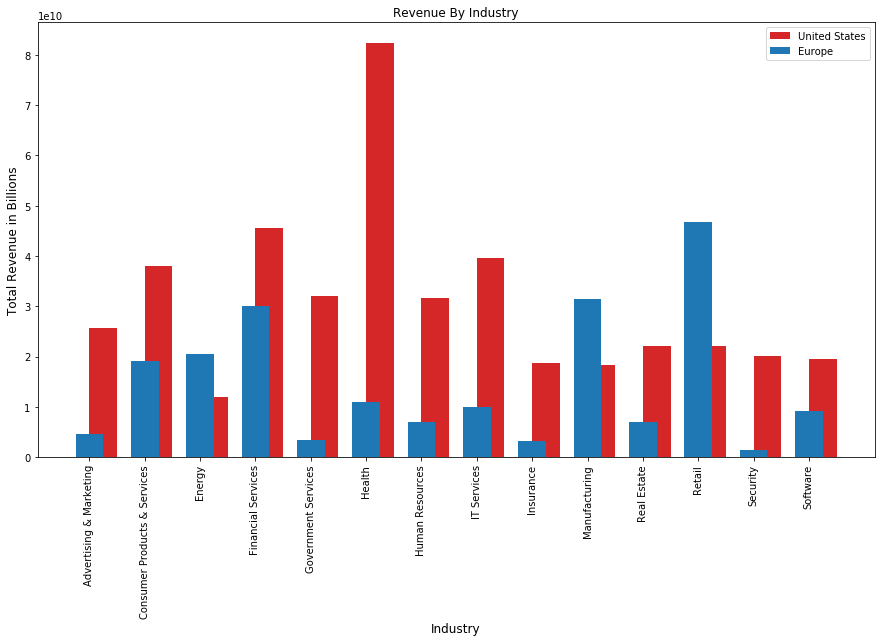

In [41]:
fig=us_sub.revenue.plot(kind='bar', figsize=(15,8),color='#d62728',position=0,legend=True, label='United States')
fig=eu_sub.revenue.plot(kind='bar', color="#1f77b4", position=1, legend=True, label='Europe',align='edge', title='Revenue By Industry')
fig.autoscale()
fig.set_ylabel('Total Revenue in Billions',fontsize='large')
fig.set_xlabel('Industry', fontsize='large')
fig

### Lax Visualizations

In [42]:
dfnew = usTable["industry"].value_counts().to_dict()
dfnew

{'IT Services': 5954,
 'Business Products & Services': 4556,
 'Advertising & Marketing': 3919,
 'Health': 3367,
 'Software': 2867,
 'Manufacturing': 2290,
 'Government Services': 2258,
 'Financial Services': 2145,
 'Construction': 2142,
 'Consumer Products & Services': 1964,
 'Retail': 1705,
 'Human Resources': 1701,
 'Telecommunications': 1298,
 'Logistics & Transportation': 1264,
 'Food & Beverage': 1255,
 'Energy': 925,
 'Real Estate': 850,
 'Engineering': 771,
 'Education': 697,
 'Security': 644,
 'Insurance': 600,
 'Environmental Services': 580,
 'Media': 564,
 'Travel & Hospitality': 455,
 'Computer Hardware': 376}

In [45]:
us10yr.head()

,year,city,growth,workers,company,state_s,revenue,industry,yrsonlist
0,2011,Nashville,14.2416,194000,HCA,TN,30683000000,Health,2
1,2010,Nashville,17.9574,192000,HCA,TN,30052000000,Health,2
2,2012,Lakeland,12.6972,152000,Publix,FL,26967389000,Food & Beverage,2
3,2011,Lakeland,9.1998,148000,Publix,FL,25134054000,Food & Beverage,2
4,2018,Eagan,372.1123,4329,Prime Therapeutics,MN,16433210000,Health,7


In [44]:
industry_rank1 = us10yr[us10yr['rank']==1]['industry'].value_counts()
industry_rank2 = us10yr[us10yr['rank']==2]['industry'].value_counts()
#making seperate dataframe with required values for plotting
df_New = pd.DataFrame([industry_rank1,industry_rank2])
df_New.index = ['rank1','rank2']
figure=df_New.plot(kind='bar',figsize=(15,8))
figure.legend(loc='upper center')

KeyError: 'rank'

In [ ]:
sns.barplot(x="industry", y="revenue", data=usTable)
plt.xticks(rotation=85)

In [ ]:
sns.barplot(x="industry", y="revenue", data=europeTable)
plt.xticks(rotation=85)

### Heatmap (Frequency of State listed on dataset)

In [54]:
api_key=getpass.getpass()

········


In [55]:
gmaps.configure(api_key=api_key)

#### Only take data from past 3 years

In [46]:
city_state=us10yrclean.loc[(us10yrclean['year']==2016) | (us10yrclean['year']==2017) | (us10yrclean['year']==2018),['city','state_s']]

#### Import csv with lat lng and the count of companies per State

In [47]:
heatmapDF=pd.read_csv('Weighted_State_Lat_Lng.csv' ,encoding="latin1")

#### Convert string data into numeric

In [48]:
locations = heatmapDF[["Lat", "Lng"]].astype(float)
companies_per_state=heatmapDF['Weight'].astype(float)

#### Create heatmap

In [57]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=companies_per_state, 
                                 dissipating=False)

#### Set max_intensity to 1000 (max value in dataset is 2000)

In [58]:
heat_layer.dissipating = False
heat_layer.max_intensity = 1000
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))